# Load Libraries 

In [1]:
# Libraries needed for data Analysis 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Libraries needed for model and visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score
import matplotlib.pyplot as plt # plots 
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read data

In [2]:
# Load in the red wine data from kaggle.
df = pd.read_csv('../input/nasa-nearest-earth-objects/neo.csv',sep=',')

# Review data
print(df.head(10))
# Data dimensionality (rows, colums)
print(df.shape)
# Data distributing
df.info()


         id                 name  est_diameter_min  est_diameter_max  \
0   2162635  162635 (2000 SS164)          1.198271          2.679415   
1   2277475    277475 (2005 WK4)          0.265800          0.594347   
2   2512244   512244 (2015 YE18)          0.722030          1.614507   
3   3596030          (2012 BV13)          0.096506          0.215794   
4   3667127          (2014 GE35)          0.255009          0.570217   
5  54138696          (2021 GY23)          0.036354          0.081291   
6  54189957          (2021 PY40)          0.171615          0.383743   
7  54230078           (2021 XD6)          0.005328          0.011914   
8   2088213     88213 (2001 AF2)          0.350393          0.783502   
9   3766065            (2016 YM)          0.105817          0.236614   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2  

# Check on nulls 

In [3]:
print('Total Null values in the dataset : ',df.isna().sum().sum())

Total Null values in the dataset :  0


# Check on dupes

In [4]:
print('Total duplicate values in the dataset : ',df.duplicated().sum())

Total duplicate values in the dataset :  0


# Understand the stats for each column

In [5]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


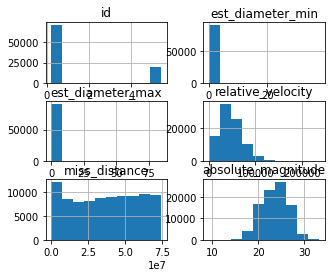

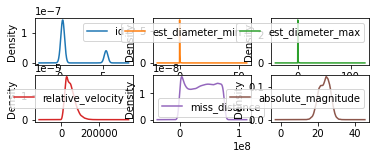

In [6]:
# Histograms
df.hist(bins=10,figsize=(5, 4))
plt.show()
# Density
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

In [7]:
# Split into X,y, removing unwanted columns and tarnsforming Hazardous data into int from bool

X = df.drop(['id','name','est_diameter_max','orbiting_body','sentry_object','hazardous'],axis=1) 

y = df.hazardous.astype('int')
print(X.shape,y.shape)

(90836, 4) (90836,)


# Split into Test and Train sets

In [8]:
# 90:10

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.1, random_state = 42)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(81752, 4)
(81752,)
(9084, 4)
(9084,)


(None, None)

XGBClassifier: 0.918240 (0.003172)
SupportVectorClassifier: 0.902290 (0.002680)
RandomForestClassifier: 0.915990 (0.003181)
DecisionTreeClassifier: 0.893458 (0.003579)
AdaBoostClassifier: 0.912124 (0.002833)
KNeighborsClassifier: 0.894290 (0.002782)
GaussianNB: 0.896969 (0.003651)
LogisticRegression: 0.902290 (0.002680)


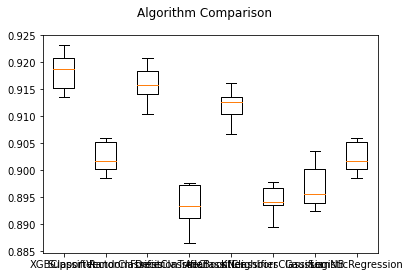

In [9]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('XGBClassifier', XGBClassifier())) 
models.append(('SupportVectorClassifier', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('LogisticRegression', LogisticRegression()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
   kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)
XGBC_pred = XGBC.predict(X_test)
accuracy = round(accuracy_score(XGBC_pred, y_test) * 100, 2)
print(accuracy)

92.08


In [11]:
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)
pred_XGBC = XGBC.predict(X_test)

# Cross-validation
scores = cross_val_score(XGBC,X_test,y_test, cv=12)
print('Accuracy score',round(scores.mean() * 100,2))

Accuracy score 90.58


In [12]:
ada_classifier = AdaBoostClassifier(n_estimators=250)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

# Cross-validation
scores = cross_val_score(ada_classifier,X_test,y_test, cv=12)
print('Accuracy score',round(scores.mean() * 100,2))

Accuracy score 91.2
